In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Tạo Dataframe như dữ liệu đã cho trên.
2. Hiển thị thông tin Dataframe vừa tạo.

In [23]:
data={
    "Product":['Laptop','Phone','Chair','Desk','Headphone','Monitor','Sofa','Keyboard','Mouse','Tablet'],
    "Category":['Electronics','Electronics','Furniture','Furniture','Accessories','Electronics','Furniture','Accessories','Accessories','Electronics'],
    "Price":[1500,800,120,300,200,600,700,150,50,400],
    "Date":['2024-01-15','2024-02-10','2024-03-15','2024-03-18','2024-04-12','2024-05-20','2024-06-20','2024-02-08','2024-07-14','2024-09-30'],
    "Quantity":[2,5,3,1,4,2,1,6,8,3]
}
df=pd.DataFrame(data)
print(df)



     Product     Category  Price        Date  Quantity
0     Laptop  Electronics   1500  2024-01-15         2
1      Phone  Electronics    800  2024-02-10         5
2      Chair    Furniture    120  2024-03-15         3
3       Desk    Furniture    300  2024-03-18         1
4  Headphone  Accessories    200  2024-04-12         4
5    Monitor  Electronics    600  2024-05-20         2
6       Sofa    Furniture    700  2024-06-20         1
7   Keyboard  Accessories    150  2024-02-08         6
8      Mouse  Accessories     50  2024-07-14         8
9     Tablet  Electronics    400  2024-09-30         3


    3. Tính giá trị trung bình của cột <Price>.

In [24]:
print("Trung bình:",df['Price'].mean())

Trung bình: 482.0


4. Nhóm dữ liệu cột <Category> và tình tổng trung bình cột <Quantity>.

In [25]:
print(df.groupby("Category")["Quantity"].mean())

Category
Accessories    6.000000
Electronics    3.000000
Furniture      1.666667
Name: Quantity, dtype: float64


5. Sắp xếp Dataframe theo cột <Price> giảm dần

In [26]:
df_sorted = df.sort_values(by='Price',ascending=False)
print(df_sorted)

     Product     Category  Price        Date  Quantity
0     Laptop  Electronics   1500  2024-01-15         2
1      Phone  Electronics    800  2024-02-10         5
6       Sofa    Furniture    700  2024-06-20         1
5    Monitor  Electronics    600  2024-05-20         2
9     Tablet  Electronics    400  2024-09-30         3
3       Desk    Furniture    300  2024-03-18         1
4  Headphone  Accessories    200  2024-04-12         4
7   Keyboard  Accessories    150  2024-02-08         6
2      Chair    Furniture    120  2024-03-15         3
8      Mouse  Accessories     50  2024-07-14         8


6. Vẽ biểu đồ cột cho <Price>.

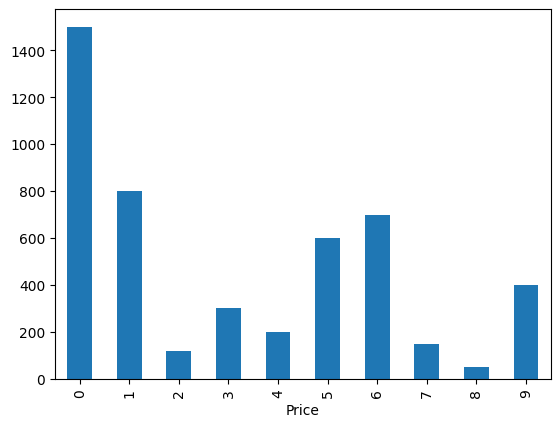

In [27]:
df["Price"].plot(kind="bar")
plt.xlabel('Price')
plt.show()


7. Vẽ biểu đồ phân tán cho <Quantity> và <Price>.

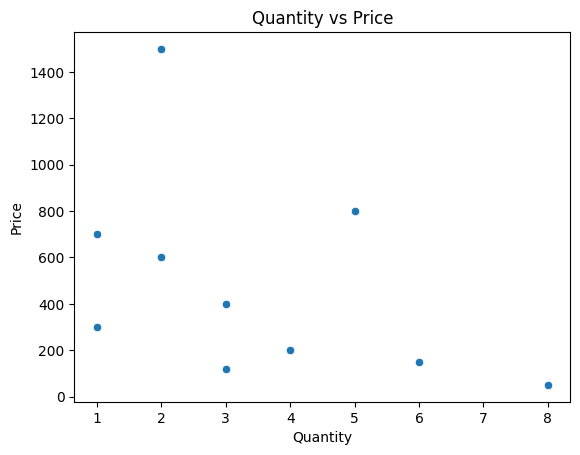

In [28]:
sns.scatterplot(x=df['Quantity'], y=df['Price'])
plt.title('Quantity vs Price')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

8. Vẽ biểu đồ đường cho cột <Date>.

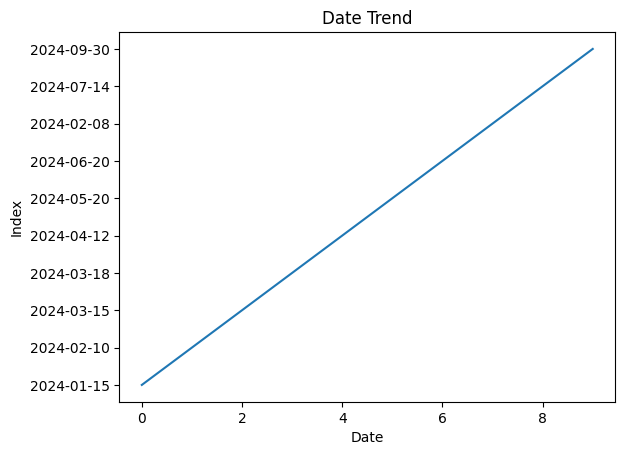

In [29]:
plt.plot(df['Date'])
plt.title('Date Trend')
plt.xlabel('Date')
plt.ylabel('Index')
plt.show()

9. Vẽ biểu đồ cột thể hiện tổng doanh thu của từng <Category>.

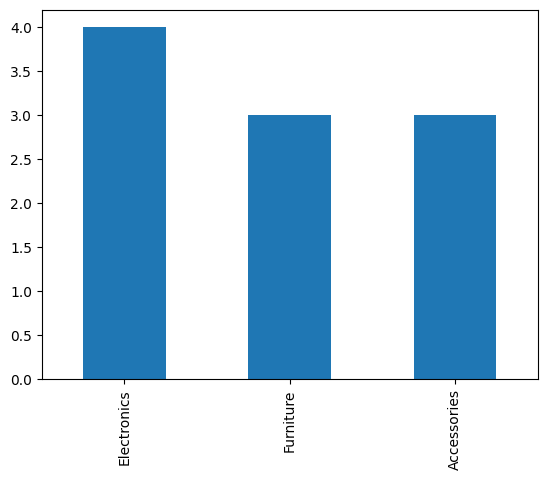

In [30]:
df['Category'].value_counts().plot(kind='bar')
plt.show()

10. Kiểm tra có giá trị NaN nào trong DataFrame không.

In [31]:
print(df.isnull().sum())

Product     0
Category    0
Price       0
Date        0
Quantity    0
dtype: int64


11. Tìm các giá trị trùng lặp trong DataFrame dựa trên cột 'Product' và loại bỏ các hàng trùng lặp, giữ lại hàng đầu tiên.

In [32]:
df = df.drop_duplicates(subset=["Product"], keep="first")
print(df)

     Product     Category  Price        Date  Quantity
0     Laptop  Electronics   1500  2024-01-15         2
1      Phone  Electronics    800  2024-02-10         5
2      Chair    Furniture    120  2024-03-15         3
3       Desk    Furniture    300  2024-03-18         1
4  Headphone  Accessories    200  2024-04-12         4
5    Monitor  Electronics    600  2024-05-20         2
6       Sofa    Furniture    700  2024-06-20         1
7   Keyboard  Accessories    150  2024-02-08         6
8      Mouse  Accessories     50  2024-07-14         8
9     Tablet  Electronics    400  2024-09-30         3


12. Lọc ra các đơn hàng có số lượng (Quantity) lớn hơn 5

In [33]:
filtered_df = df[df['Quantity'] > 5]
print(filtered_df)


    Product     Category  Price        Date  Quantity
7  Keyboard  Accessories    150  2024-02-08         6
8     Mouse  Accessories     50  2024-07-14         8


13. Tổng doanh thu được tính theo công thức sau:

Revenue = Quantity × Price

Tạo một cột mới trong Dataframe với tên <Revenue> gồm tổng doanh thu của các sản phẩm.


In [34]:
df['Revenue'] = df['Quantity'] * df['Price']
df.head(10)

,Product,Category,Price,Date,Quantity,Revenue
0,Laptop,Electronics,1500,2024-01-15,2,3000
1,Phone,Electronics,800,2024-02-10,5,4000
2,Chair,Furniture,120,2024-03-15,3,360
3,Desk,Furniture,300,2024-03-18,1,300
4,Headphone,Accessories,200,2024-04-12,4,800
5,Monitor,Electronics,600,2024-05-20,2,1200
6,Sofa,Furniture,700,2024-06-20,1,700
7,Keyboard,Accessories,150,2024-02-08,6,900
8,Mouse,Accessories,50,2024-07-14,8,400
9,Tablet,Electronics,400,2024-09-30,3,1200


14. Thêm một cột <Sales_Level> với điều kiện:
+ < 500  ->>  Low
+ 500 --- 2000  ->> Medium
+ >2000   ->> High 

In [36]:
def categorize_sales(revenue):
    if revenue < 500:
        return 'Low'
    elif 500 <= revenue <= 2000:
        return 'Medium'
    else:
        return 'High'

df['Sales_Level'] = df['Revenue'].apply(categorize_sales)
print(df)

     Product     Category  Price        Date  Quantity  Revenue Sales_Level
0     Laptop  Electronics   1500  2024-01-15         2     3000        High
1      Phone  Electronics    800  2024-02-10         5     4000        High
2      Chair    Furniture    120  2024-03-15         3      360         Low
3       Desk    Furniture    300  2024-03-18         1      300         Low
4  Headphone  Accessories    200  2024-04-12         4      800      Medium
5    Monitor  Electronics    600  2024-05-20         2     1200      Medium
6       Sofa    Furniture    700  2024-06-20         1      700      Medium
7   Keyboard  Accessories    150  2024-02-08         6      900      Medium
8      Mouse  Accessories     50  2024-07-14         8      400         Low
9     Tablet  Electronics    400  2024-09-30         3     1200      Medium


15. Vẽ biểu đồ cột thể hiện số lượng đơn hàng ở từng mức <Sales_Level>.

<AxesSubplot:>

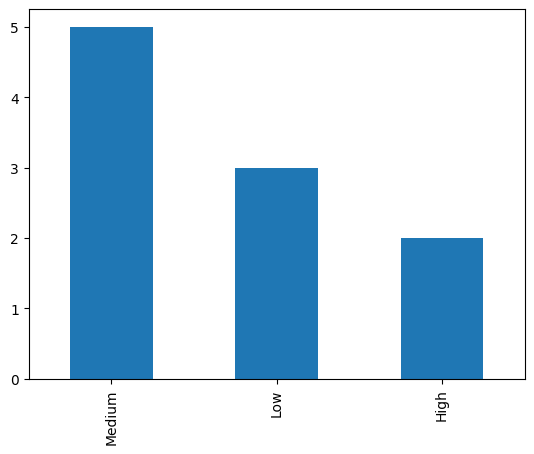

In [37]:
df['Sales_Level'].value_counts().plot(kind='bar')

16. Tạo một cột mới <Discount> với giá trị giảm giá 10% nếu doanh thu (Revenue) > 1000, ngược lại giảm giá 5%.

In [43]:
df['Discount'] = df['Revenue'].apply(lambda x: x * 0.1 if x > 1000 else x * 0.05)
df.head()

,Product,Category,Price,Date,Quantity,Revenue,Sales_Level,Discount,Final_Revenue
0,Laptop,Electronics,1500,2024-01-15,2,3000,High,300.0,-897000.0
1,Phone,Electronics,800,2024-02-10,5,4000,High,400.0,-1596000.0
2,Chair,Furniture,120,2024-03-15,3,360,Low,18.0,-6120.0
3,Desk,Furniture,300,2024-03-18,1,300,Low,15.0,-4200.0
4,Headphone,Accessories,200,2024-04-12,4,800,Medium,40.0,-31200.0


17. Tính doanh thu sau giảm giá <Final_Revenue> bằng công thức:

Final_Revenue = Revenue - ( Revenue ×Discount ).

Tạo một cột mới trong Dataframe với tên <Final_Revenue> gồm doanh thu sau giảm giá.


In [42]:
df['Final_Revenue'] = df['Revenue'] - (df['Revenue'] * df['Discount'])
df.head()

,Product,Category,Price,Date,Quantity,Revenue,Sales_Level,Discount,Final_Revenue
0,Laptop,Electronics,1500,2024-01-15,2,3000,High,300.0,-897000.0
1,Phone,Electronics,800,2024-02-10,5,4000,High,400.0,-1596000.0
2,Chair,Furniture,120,2024-03-15,3,360,Low,18.0,-6120.0
3,Desk,Furniture,300,2024-03-18,1,300,Low,15.0,-4200.0
4,Headphone,Accessories,200,2024-04-12,4,800,Medium,40.0,-31200.0


18. Tạo cột <Month> lấy giá trị tháng từ cột <Date>.

In [45]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df.head()

,Product,Category,Price,Date,Quantity,Revenue,Sales_Level,Discount,Final_Revenue,Month
0,Laptop,Electronics,1500,2024-01-15,2,3000,High,300.0,-897000.0,1
1,Phone,Electronics,800,2024-02-10,5,4000,High,400.0,-1596000.0,2
2,Chair,Furniture,120,2024-03-15,3,360,Low,18.0,-6120.0,3
3,Desk,Furniture,300,2024-03-18,1,300,Low,15.0,-4200.0,3
4,Headphone,Accessories,200,2024-04-12,4,800,Medium,40.0,-31200.0,4


19. Vẽ biểu đồ đường thể hiện tổng doanh thu theo tháng

<AxesSubplot:xlabel='Month'>

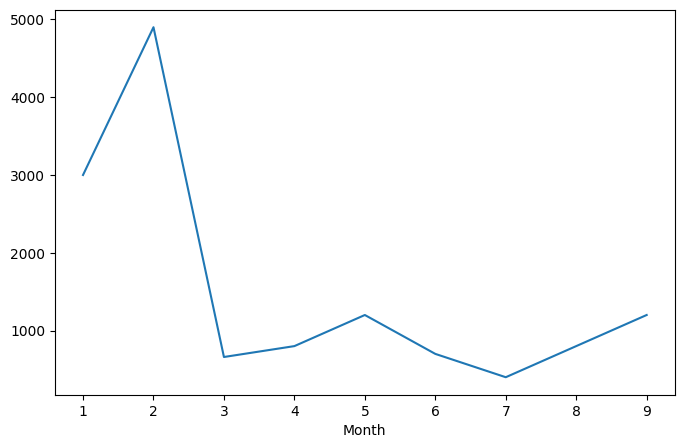

In [47]:
monthly_revenue = df.groupby('Month')['Revenue'].sum()
plt.figure(figsize=(8, 5))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values)

20. Lưu DataFrame với tên <BKT_MSSV_Hoten.csv-->

In [51]:
df.to_csv('BKT_2274802010174_BuiBaMinhdang.csv')
